# Project 2 - DATA ANALYSIS AND MACHINE LEARNING COURSE (February, 2021)

Delgado Jessica, Karagianni Christina, Ruiz Vladmir, Selemon Deborah

In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
from IPython.display import display
from pylab import plt, mpl
#import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout ,Flatten
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.callbacks import EarlyStopping

ModuleNotFoundError: No module named 'tensorflow'

Structuring and reading the data.

,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high blood pressure,platelets,serum creatinine,serum sodium,sex,smoking,time,death event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


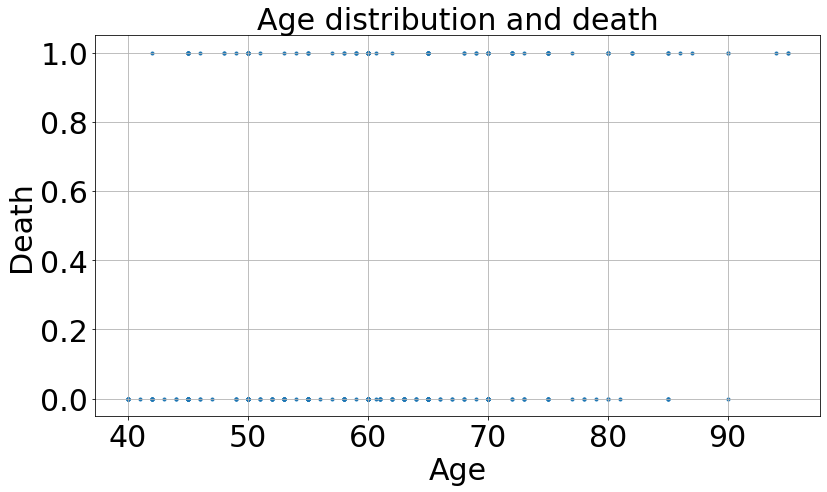

In [2]:
# Reading the dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv", names=( 'age', 'anaemia',  
                                                                       'creatinine phosphokinase', 'diabetes',
                                                                       'ejection fraction', 'high blood pressure', 'platelets', 
                                                                       'serum creatinine', 'serum sodium', 'sex', 'smoking',
                                                                       'time', 'death event'))

# Defining the variables 
age = data['age'] # Age of the patient (years)
anaemia = data['anaemia'] # Decrease of red blood cells or hemoglobin (boolean)
HBP = data['high blood pressure'] # If the patient has hypertension (boolean)
CPK = data['creatinine phosphokinase'] # Level of the CPK enzyme in the blood (mcg/L)
diabetes = data['diabetes'] # If the patient has diabetes (boolean)
ejection_fraction = data['ejection fraction'] # Percentage of blood leaving the heart at each contraction (percentage)
platelets = data['platelets'] # Platelets in the blood (kiloplatelets/mL)
sex = data['sex'] # Woman or man (binary)
serum_creatinine = data['serum creatinine'] # Level of serum creatinine in the blood (mg/dL)
serum_sodium = data['serum sodium'] # Level of serum sodium in the blood (mEq/L)
smoking = data['smoking'] # If the patient smokes or not (boolean)
time = data['time'] # Follow-up period (days)
death = data['death event'] # If the patient deceased during the follow-up period (boolean)

display(data)

fig1 = plt.figure(figsize=(13,7))
axes = plt.gca()
axes.tick_params(axis = 'both', which = 'major', labelsize = 20)
axes.tick_params(axis = 'both', which = 'minor', labelsize = 20)
plt.scatter(age, death, marker='.')
plt.xlabel('Age',size=30)
plt.ylabel('Death',fontsize=30)
plt.title('Age distribution and death',fontsize=30)
fig1.savefig("death-age.jpg", dpi=150)
plt.xticks(size = 30)
plt.yticks(size = 30)
axes.grid(b=True, which='major', linestyle='-')
plt.show()

# WE HAVE A BINARY OUTPUT = death 0 or 1

In [3]:
# Plotting a count plot of the targer attribute
# Evaluating the target and finding out if the data is balanced or not

cols= ["#6daa9f","#774571"]
sns.countplot(x= death, palette= cols)

# the data is not balanced!

NameError: name 'sns' is not defined

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A2C86380A0>,
      dtype=object)

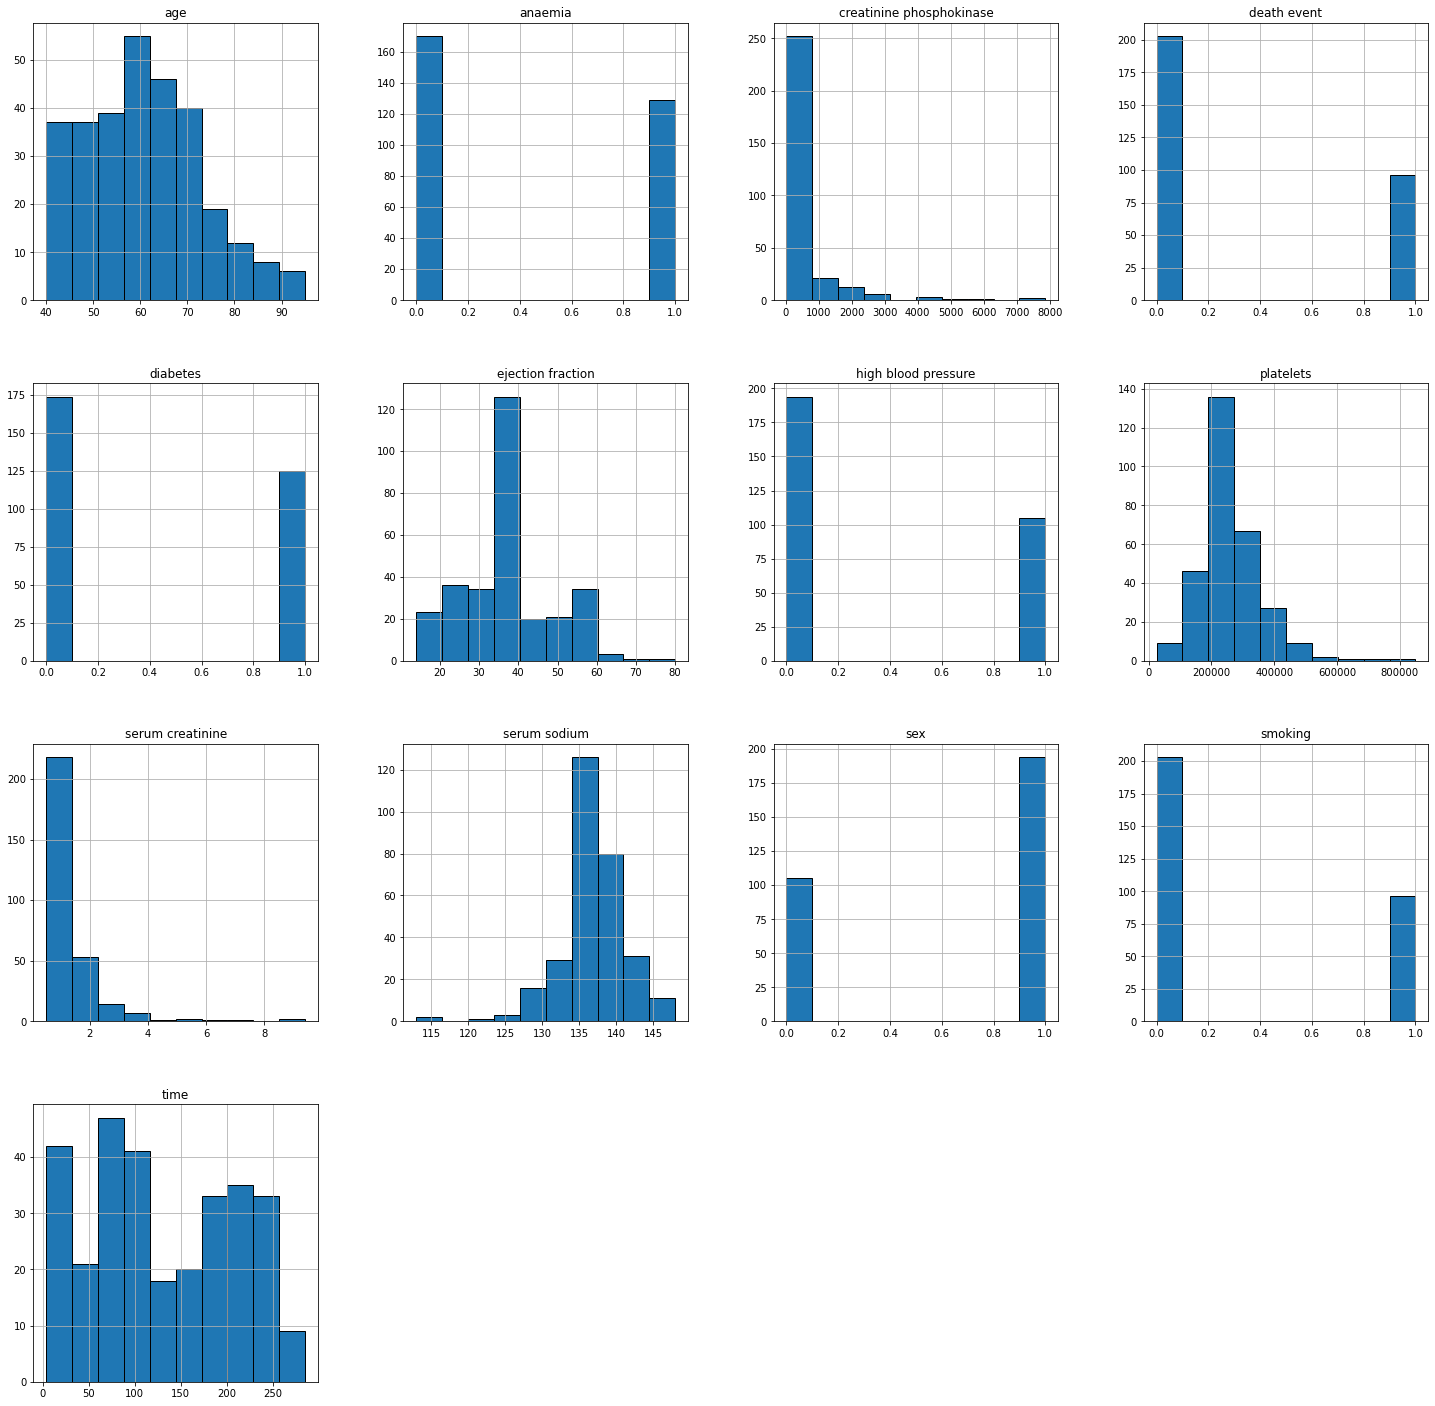

In [4]:
# Visualization of all attributes
data.hist(figsize=(25,25),edgecolor='black')

In [5]:
# Correlation matrix - computing the pair wise correlation for all columns  
correlation_matrix = data.corr().round(1)
#print(correlation_matrix)

# Using the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
fig2 = plt.figure(figsize=(13,7))
sns.heatmap(data=correlation_matrix, annot=True)
fig2.savefig("correlation_matrix.jpg", dpi=150)
plt.show()

# Feature Selection

sns.set_style("darkgrid")
x = data.iloc[:, :-1]
y = data.iloc[:,-1]

model = ExtraTreesClassifier()
model.fit(x,y)
print('Model feature importances')
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

print('We select the 4 highest correlating features (time, ejection fraction, serum creatine and age) for the analysis.')

NameError: name 'sns' is not defined

<Figure size 936x504 with 0 Axes>

In [15]:
X_selected = data[['age', 'ejection fraction', 'serum creatinine','time']]


# Splitting the data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X_selected,death,random_state=0)
# the selected features are what we use to predict
# death is what we want to predict

#print(X_train.shape)
#print(X_test.shape)

# Logistic Regression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression before scaling: {:.3f}".format(logreg.score(X_test,y_test)))

#Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
logreg.fit(X_train_scaled, y_train)
print("Test set accuracy Logistic Regression with scaled data: {:.3f}".format(logreg.score(X_test_scaled,y_test)))

Test set accuracy with Logistic Regression before scaling: 0.800
Test set accuracy Logistic Regression with scaled data: 0.787


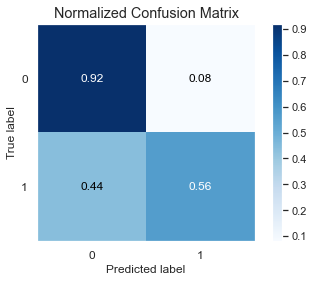

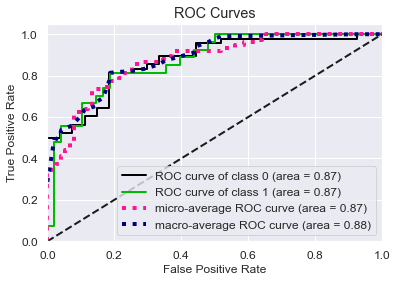

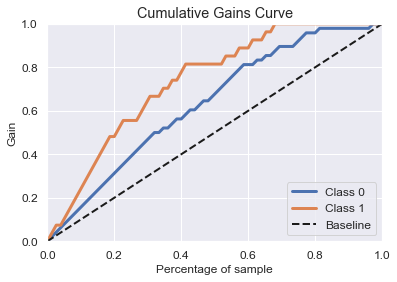

In [16]:
y_pred = logreg.predict(X_test_scaled)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()
y_probas = logreg.predict_proba(X_test_scaled)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()

Compraring the different models

In [17]:
# Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

death_predistions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train,death_predistions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

# Decission tree

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

death_predistions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train,death_predistions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

# OVERFITTING!

0.3534077466759757
0.0


the lower the std the better

In [18]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Better Evaluation Using Cross-Validation

# Decision tree
tree_scores = cross_val_score(tree_reg, X_train, y_train, scoring ="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
print("Decision Trees")
display_scores(tree_rmse_scores)
print("")

# Linear Regression
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring ="neg_mean_squared_error",cv=10)
lin_scores = np.sqrt(-lin_scores)
print("Linear regression")
display_scores(lin_scores)
print("")

# Random Forest Classifier
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train,y_train)
forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring ="neg_mean_squared_error",cv=10)
forest_scores = np.sqrt(-forest_scores)
print("Random forests")
display_scores(forest_scores)
print("")

# Logistic regression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
log_scores = cross_val_score(logreg, X_train, y_train, scoring ="neg_mean_squared_error",cv=10)
log_scores = np.sqrt(-log_scores)
print("Logistic Regression")
display_scores(log_scores)
print("")

# Support vector machines
svc_reg = SVC()
svc_reg.fit(X_train,y_train)
svc_reg_scores = cross_val_score(svc_reg, X_train, y_train, scoring ="neg_mean_squared_error",cv=10)
svc_reg_scores = np.sqrt(-svc_reg_scores)
print("Support vector machines")
display_scores(svc_reg_scores)
print("")

Decision Trees
Scores: [0.36115756 0.55167728 0.4662524  0.36115756 0.42640143 0.36927447
 0.42640143 0.60302269 0.47673129 0.47673129]
Mean: 0.4518807423763702
Standard deviation: 0.07669971351171889

Linear regression
Scores: [0.30342555 0.39943389 0.33153189 0.32128021 0.35984989 0.32134104
 0.38818904 0.45418781 0.3759105  0.3318507 ]
Mean: 0.3587000530559633
Standard deviation: 0.04387993588147763

Random forests
Scores: [0.28630327 0.43457626 0.32247009 0.2762875  0.41894348 0.34830107
 0.32460465 0.46985007 0.37388015 0.32017041]
Mean: 0.35753869469071387
Standard deviation: 0.06169168831825065

Logistic Regression
Scores: [0.36115756 0.29488391 0.41702883 0.36115756 0.36927447 0.30151134
 0.42640143 0.47673129 0.42640143 0.36927447]
Mean: 0.3803822309437557
Standard deviation: 0.05420163171229282

Support vector machines
Scores: [0.36115756 0.4662524  0.29488391 0.20851441 0.42640143 0.36927447
 0.47673129 0.47673129 0.42640143 0.36927447]
Mean: 0.3875622690288364
Standard devi

Another way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will
have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.
Scikit-Learn provides a function to compute the ROC AUC.

In [19]:
def plot_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    
# Linear regression

y_score_lin = cross_val_predict(lin_reg, X_train, y_train)
fpr_lin, tpr_lin, threshold_lin = roc_curve(y_train, y_score_lin)

# Decision Trees
y_score_tree = cross_val_predict(tree_reg, X_train, y_train)
fpr_tree, tpr_tree , threshold_tree = roc_curve(y_train, y_score_tree)

# Random Forests
y_score_random = cross_val_predict(forest_reg, X_train, y_train)
fpr_random, tpr_random , threshold_random = roc_curve(y_train, y_score_random)

# Logistic regression
y_score_log = cross_val_predict(logreg, X_train, y_train)
fpr_log, tpr_log, threshold_log = roc_curve(y_train, y_score_log)

# Support vector machines
from sklearn.svm import SVC

svc_reg = SVC()
svc_reg.fit(X_train,y_train)

y_score_svc = cross_val_predict(svc_reg, X_train, y_train)
fpr_svc, tpr_svc, threshold_svc = roc_curve(y_train, y_score_svc)


print('ROC-AUC Score Decision Trees: ', roc_auc_score(y_train, y_score_tree))
print('ROC-AUC Score Random Forests: ', roc_auc_score(y_train, y_score_random))
print('ROC-AUC Score Logistic Regression: ', roc_auc_score(y_train, y_score_log))
print('ROC-AUC Score Support vector machines: ', roc_auc_score(y_train, y_score_svc))
print('ROC-AUC Score Linear regession: ', roc_auc_score(y_train, y_score_lin))

ROC-AUC Score Decision Trees:  0.6939223936418888
ROC-AUC Score Random Forests:  0.8689574567554932
ROC-AUC Score Logistic Regression:  0.8066853669939225
ROC-AUC Score Support vector machines:  0.774520804114072
ROC-AUC Score Linear regession:  0.8855539971949509


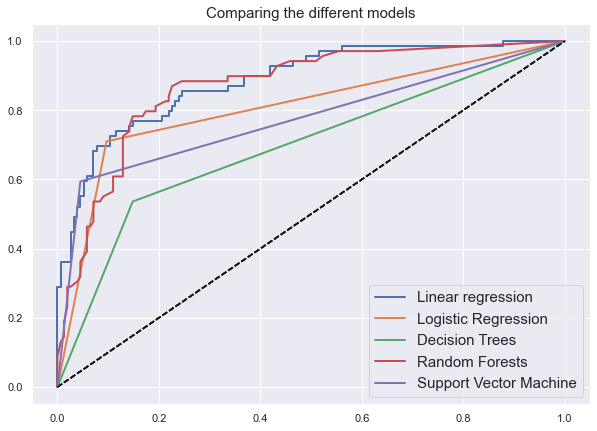

In [20]:
fig100 = plt.figure(figsize=(10,7))
plot_curve(fpr_lin, tpr_lin, label='Linear regression')
plot_curve(fpr_log, tpr_log, label='Logistic Regression')
plot_curve(fpr_tree, tpr_tree, label='Decision Trees')
plot_curve(fpr_random, tpr_random, label='Random Forests')
plot_curve(fpr_svc, tpr_svc, label='Support Vector Machine')

plt.title('Comparing the different models',fontsize=15)
plt.legend(fontsize=15)
fig100.savefig("ROC-curves.jpg", dpi=150)
plt.show()

Artificial Neural Network (ANN) - scikit-learn implementation

In [21]:
eta_vals = np.logspace(-5, 1, 7)
lmbd_vals = np.logspace(-5, 1, 7)
n_hidden_neurons = 50

epochs = 1000

# store models for later use
DNN_scikit = np.zeros((len(eta_vals), len(lmbd_vals)), dtype=object)

for i, eta in enumerate(eta_vals):
    for j, lmbd in enumerate(lmbd_vals):
        dnn = MLPClassifier(hidden_layer_sizes=(n_hidden_neurons), activation='logistic',
                            alpha=lmbd, learning_rate_init=eta, max_iter=epochs)
        dnn.fit(X_train, y_train)
        
        DNN_scikit[i][j] = dnn
        
        print("Learning rate  = ", eta)
        print("Lambda = ", lmbd)
        print("Accuracy score on test set: ", dnn.score(X_test, y_test))
        print()

Learning rate  =  1e-05
Lambda =  1e-05
Accuracy score on test set:  0.64



C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  0.0001
Accuracy score on test set:  0.7466666666666667



C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  0.001
Accuracy score on test set:  0.7866666666666666



C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  0.01
Accuracy score on test set:  0.6533333333333333



C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  0.1
Accuracy score on test set:  0.7733333333333333

Learning rate  =  1e-05
Lambda =  1.0
Accuracy score on test set:  0.76



C:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning rate  =  1e-05
Lambda =  10.0
Accuracy score on test set:  0.7866666666666666

Learning rate  =  0.0001
Lambda =  1e-05
Accuracy score on test set:  0.8266666666666667

Learning rate  =  0.0001
Lambda =  0.0001
Accuracy score on test set:  0.8266666666666667

Learning rate  =  0.0001
Lambda =  0.001
Accuracy score on test set:  0.8133333333333334

Learning rate  =  0.0001
Lambda =  0.01
Accuracy score on test set:  0.8266666666666667

Learning rate  =  0.0001
Lambda =  0.1
Accuracy score on test set:  0.8133333333333334

Learning rate  =  0.0001
Lambda =  1.0
Accuracy score on test set:  0.8266666666666667

Learning rate  =  0.0001
Lambda =  10.0
Accuracy score on test set:  0.8133333333333334

Learning rate  =  0.001
Lambda =  1e-05
Accuracy score on test set:  0.84

Learning rate  =  0.001
Lambda =  0.0001
Accuracy score on test set:  0.8266666666666667

Learning rate  =  0.001
Lambda =  0.001
Accuracy score on test set:  0.8266666666666667

Learning rate  =  0.001
Lambda = 

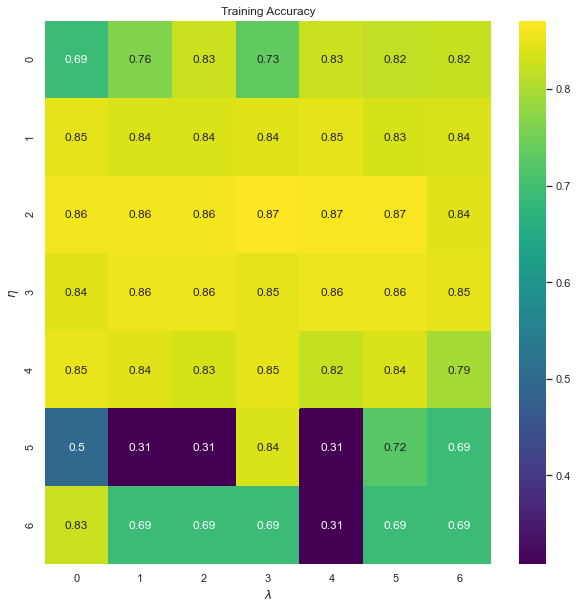

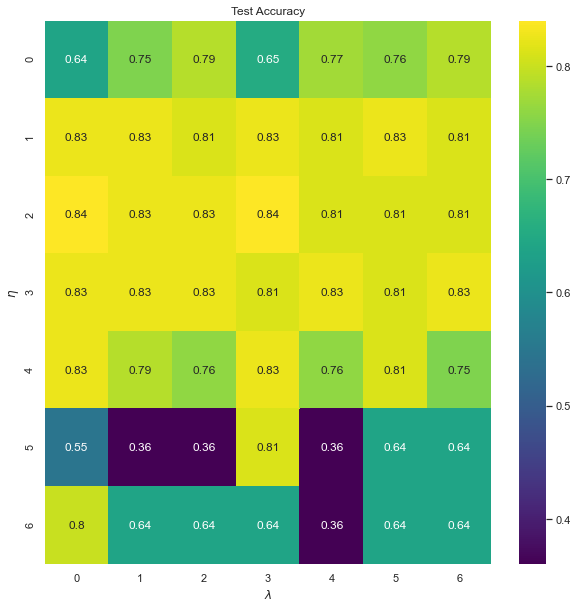

In [22]:
sns.set()

train_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))
test_accuracy = np.zeros((len(eta_vals), len(lmbd_vals)))

for i in range(len(eta_vals)):
    for j in range(len(lmbd_vals)):
        dnn = DNN_scikit[i][j]
        
        train_pred = dnn.predict(X_train) 
        test_pred = dnn.predict(X_test)

        train_accuracy[i][j] = accuracy_score(y_train, train_pred)
        test_accuracy[i][j] = accuracy_score(y_test, test_pred)

        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(train_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

Constructing a neural network in Tensorflow, using NN by keras

In [23]:
normalize = Normalization()


model = Sequential([
   normalize,
    Flatten(input_shape=(12,)),
    Dense(32, activation=tf.nn.tanh),
      Dropout(0.5),
    Dense(16, activation=tf.nn.tanh),
     Dropout(0.5),
    Dense(1, activation=tf.nn.sigmoid),
])

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10,restore_best_weights=True)

model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          batch_size=10,
          validation_data=(X_test, y_test),
           callbacks=[early_stop]
          )

Epoch 1/500
23/23 [==============================] - 1s 8ms/step - loss: 0.6937 - accuracy: 0.6404 - val_loss: 0.5809 - val_accuracy: 0.6400
Epoch 2/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.6716 - val_loss: 0.5726 - val_accuracy: 0.6800
Epoch 3/500
23/23 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.8263 - val_loss: 0.5632 - val_accuracy: 0.6933
Epoch 4/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5928 - accuracy: 0.7204 - val_loss: 0.5597 - val_accuracy: 0.7867
Epoch 5/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.7082 - val_loss: 0.5366 - val_accuracy: 0.8133
Epoch 6/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6146 - accuracy: 0.7362 - val_loss: 0.5259 - val_accuracy: 0.8133
Epoch 7/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5462 - accuracy: 0.7298 - val_loss: 0.5251 - val_accuracy: 0.8133
Epoch 8/500
2